# Project Description

The research is done for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
The data is going back to 2016 and we’re planning a campaign for 2017.
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Open the data file and study the general information

### General information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats as st
!pip install -Uq seaborn --user
!pip install -Uq sidetable --user
import sidetable

In [2]:
games=pd.read_csv('/datasets/games.csv')
print(games.info())
print(games.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2 

In [3]:
print(games[games['Name'].isna()])

      Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [4]:
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [5]:
len(games[games.User_Score=='tbd'].index)

2424

In [6]:
print(len(games['Name'].unique()))

11560


In [7]:
print(games.describe())

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


In [8]:
print(sum(games.duplicated()))

0


### Conclusion

We were provided with the data on game sales in different regions, game titles, platforms, ratings, years of release and critic and user scores.
<br> We can see that there is a significant amount of missing data to deal with.
<br>We have 11560 unique game titles. Some games were released on several platforms. Some were re-released in a different year.<br>Most of the missing values are in scores columns. The user score column even contains the "tbd" values - to be determined. The missing values in scores can be explained by the time of the data gathering - if the game was too new to have scores information.
<br>Missing values in rating can be explained by the game age, old games didn't have ratings. Also, games could have versions with different ratings, or the rating was different depending on the region, therefore it was hard to determine.
<br>Another overall reason for missing values is the usage of several sources that contained different kinds of information about games, or incomplete data. 
<br>We can try to fill some amount of the missing values based on the game title. Or use an external source of information.

## Prepare the data

### Rename the columns

In [9]:
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Convert data types

1. The year of release will be converted to  integer to save space.
2. Scores are float, Critic_Score (maximum of 100) and User_Score (maximum of 10), will be converted into integer type. For our research, we can round up the data in these columns. 
3. "TBD" in user score will become "NA". At the time of the data collection, this data wasn't available, so we'll treat it as missing data.
4. Sales data will stay float, we can't round it up without losing some  information about little sales, which might later affect the total sales values.

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = np.floor(pd.to_numeric(games['user_score'], errors='coerce')).astype('Int64')
#games["na_sales"] = games["na_sales"].round().astype(int)
#games["eu_sales"] = games["eu_sales"].round().astype(int)
#games["jp_sales"] = games["jp_sales"].round().astype(int)
#games["other_sales"] = games["other_sales"].round().astype(int)

print(games.info())
games.stb.missing(style=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.5+ MB
None


,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


### Missing values

- We will drop two rows with no game title. It won't affect our data.
- Since there are games that were released on different platforms on remastered, we can fill some missing values based on the game names, assuming scores would've been approximately the same.

In [11]:
#drop two rows for unknown games
games = games[games.name.notnull()]
#filled in missing values based on the game name
games = games.fillna({'year_of_release': games.groupby('name')['year_of_release'].transform('first')})
games = games.fillna({'critic_score': games.groupby('name')['critic_score'].transform('first')})
games = games.fillna({'user_score': games.groupby('name')['user_score'].transform('first')})
games = games.fillna({'rating': games.groupby('name')['rating'].transform('first')})
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   Int64  
 9   user_score       8689 non-null   Int64  
 10  rating           10386 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB
None


Checking for duplicated data:

In [12]:
print(sum(games.duplicated()))

0


We still have a lot of missing data. So we can try to fill it from open data sources from the gaming websites.

In [13]:
from io import BytesIO
import requests
spreadsheet_id = '1XLo_MUCYzUtpMUoohqREF20XbDAwrdhgaS9cfof8doE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
metacritic_games = pd.read_csv(BytesIO(r.content))
metacritic_games

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"
...,...,...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,"Oct 10, 2017"
15643,38,Randall,PS4,2.1,"Jun 6, 2017"
15644,36,Tokyo Tattoo Girls,VITA,5.4,"Nov 14, 2017"
15645,26,Road Rage,PS4,2.5,"Nov 14, 2017"


In [14]:
metacritic_games['userscore'] = np.floor(pd.to_numeric(metacritic_games['userscore'], errors='coerce')).astype('Int64')
games = games.fillna({'user_score': metacritic_games.groupby('name')['userscore'].transform('first')})
games = games.fillna({'critic_score': metacritic_games.groupby('name')['metascore'].transform('first')})
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     15961 non-null  Int64  
 9   user_score       15428 non-null  Int64  
 10  rating           10386 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB
None


In [15]:
print(games.describe())
print(games['rating'].value_counts())

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16567.000000  16713.000000  16713.000000  16713.000000   
mean       2006.488682      0.263302      0.145045      0.077625   
std           5.864797      0.813565      0.503359      0.308871   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score    user_score  
count  16713.000000  15961.000000  15428.000000  
mean       0.047343     68.841489      6.579012  
std        0.186742     13.613330      1.485233  
min        0.000000     11.000000      0.000000  
25%        0.000000     61.000000      6.000000  
50%        0.010000     71.000000      7.000000  
75%        0.030000     79.000000    

In [16]:
from io import BytesIO
import requests
spreadsheet_id = '1uRf0AQShZ6UKyZzkiUSc5T0bYZT5Dq3jDAIsHRWagDk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rating_games = pd.read_csv(BytesIO(r.content))
rating_games

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [17]:
games = games.fillna({'rating': rating_games.groupby('title')['esrb_rating'].transform('first')})
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     15961 non-null  Int64  
 9   user_score       15428 non-null  Int64  
 10  rating           10916 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB
None


In [18]:
games.stb.missing(style=True)

,missing,total,percent
rating,"5,797","16,713",34.69%
user_score,"1,285","16,713",7.69%
critic_score,752,"16,713",4.50%
year_of_release,146,"16,713",0.87%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


Now the missing values in scores columns are less than 10 %, and we can continue our research more efficiently.
<br> However we still missing a lot of rating info in our data. We can't fill it now without damaging the data, so we leave it as it is for now. We might go back to it later, or fill it with some markers like 'unknown' for convenience. 
<br> For critic scores we will fill missing values with '111' (since the max is 100) to mark them and user score with '11'.

In [19]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games = games.loc[games['year_of_release']!= 0]

games['user_score'] = games['user_score'].fillna(11)
games['critic_score'] = games['critic_score'].fillna(111)
games['rating'] = games['rating'].fillna('unknown')
print(games.info())
games.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  Int64  
 9   user_score       16567 non-null  Int64  
 10  rating           16567 non-null  object 
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,97,8,ET
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,94,8,T


### Total Sales

In [20]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games = games.reindex(columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales','other_sales',
                              'critic_score','user_score','rating','total_sales'])
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  Int64  
 9   user_score       16567 non-null  Int64  
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.7+ MB
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Conclusion

We converted the data types to the appropriate ones, lowercased the column names.
<br>Filled as many missing data as possible, and left the rest as it is. 
<br>Calculated the total sales.
<br>In the next steps we will filter our data to work only with the slice that would allow us to do a prognosis. After that, we might make corrections on the way we handled the missing data. For now, we considered it to be enough to keep working on the task. 

##  Analyze the data

### Data through years

In [21]:
games_by_years=games[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
games_by_years

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


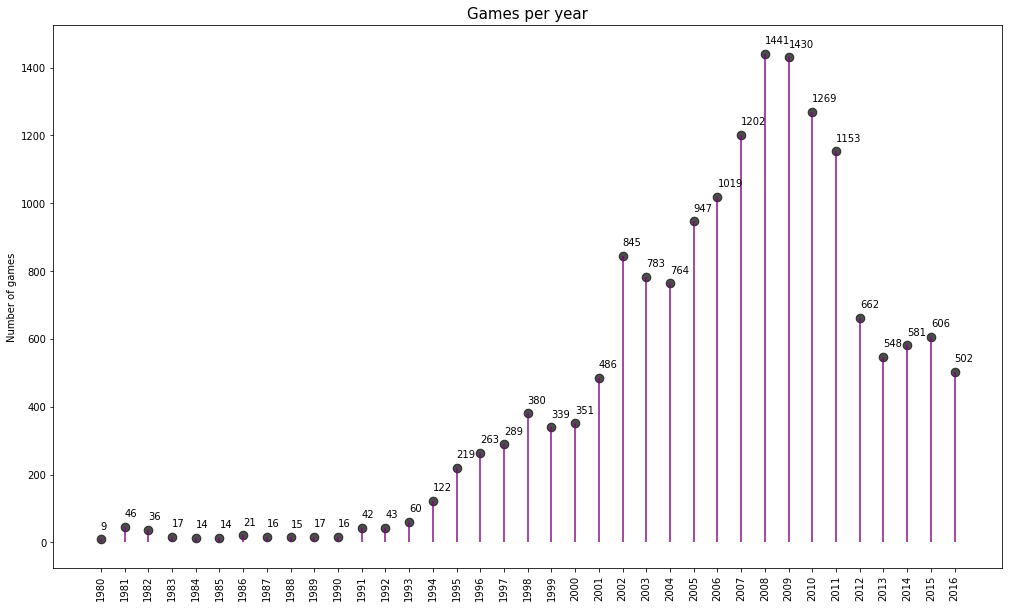

In [22]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_by_years.year_of_release, ymin=0, ymax=games_by_years.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=games_by_years.year_of_release,y=games_by_years.name, s=75, color='black',alpha=0.7)

ax.set_title("Games per year", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(games_by_years.year_of_release)
ax.set_xticklabels(games_by_years.year_of_release,rotation=90)

for row in games_by_years.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

We can watch the sales gradually growing through the years until the significant increase in the 2000s with a pick in 2008-2009. <br>After that, we can see the drop in sales, presumably because of the consequences of the economical crisis.
<br>Based on these graphs we can see that it is safer to base our prognosis on the data from the nearest years (2-3).
<br>Also, we can see the sales being approximately at the same level, we hardly can expect significant growth.

### Data analysis for platforms

In [23]:
games_by_pl=games[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

games_by_pl

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


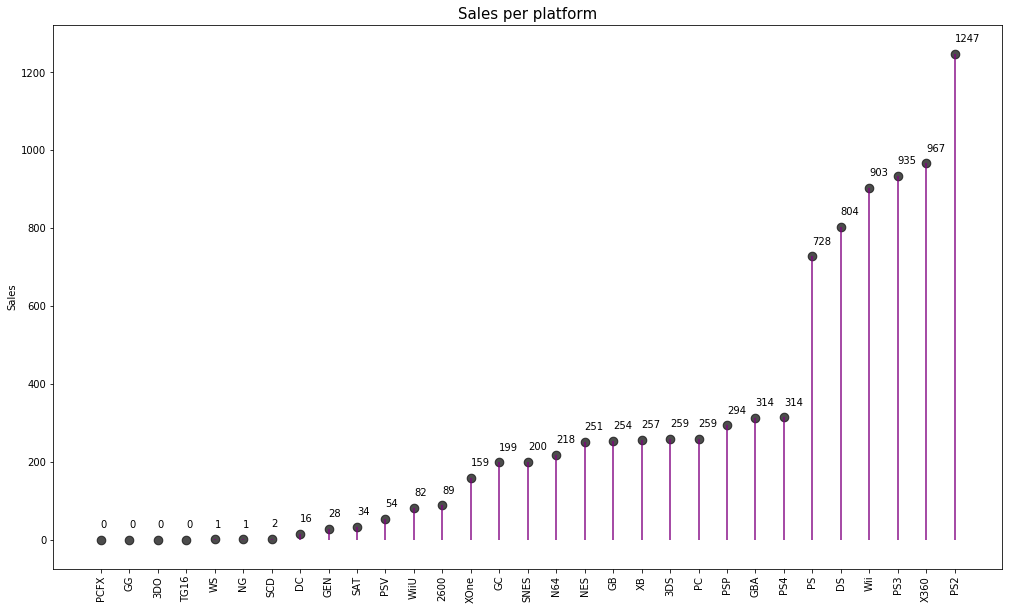

In [24]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_by_pl.platform, ymin=0, ymax=games_by_pl.total_sales, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=games_by_pl.platform,y=games_by_pl.total_sales, s=75, color='black',alpha=0.7)

ax.set_title("Sales per platform", fontdict={'size':15})
ax.set_ylabel('Sales')
ax.set_xticks(games_by_pl.platform)
ax.set_xticklabels(games_by_pl.platform,rotation=90)

for row in games_by_pl.itertuples():
    ax.text(row.platform, row.total_sales+30, s=round(row.total_sales))

In [25]:
games_pl=games.pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc=('sum'))
games_pl = pd.DataFrame(games_pl.to_records())
top5 = (games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index().head(5)['platform'])
top10 = (games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index().head(10)['platform'])
games_pl5=games_pl.query('platform in @top5')

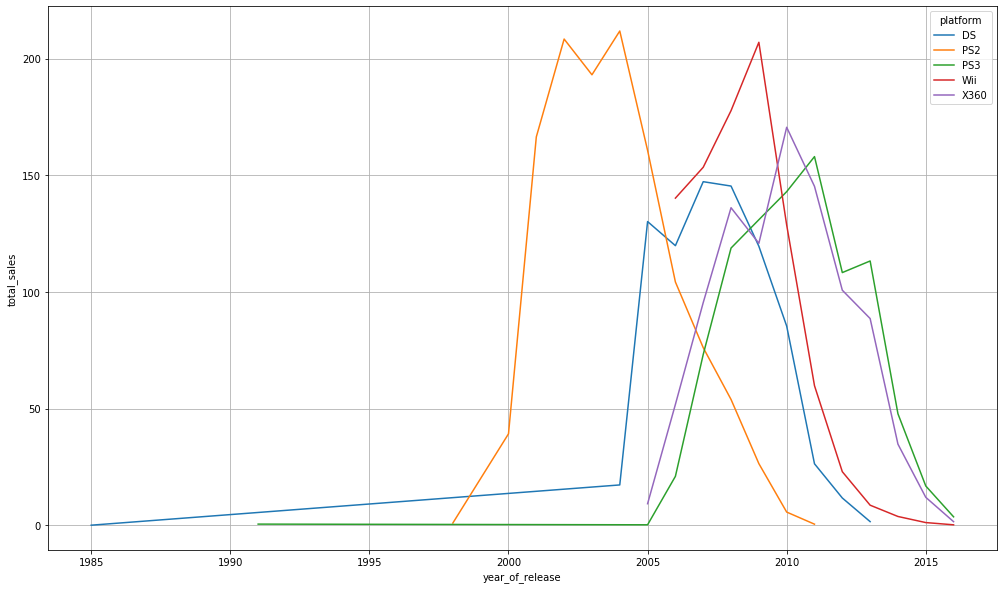

In [26]:
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=games_pl5, x="year_of_release", y="total_sales", hue="platform",markers ="o")
plt.grid()
plt.show()
ax.set_xticks(games_pl5.year_of_release)
ax.set_xticklabels(games_pl5.year_of_release,rotation=90)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210])
plt.show()

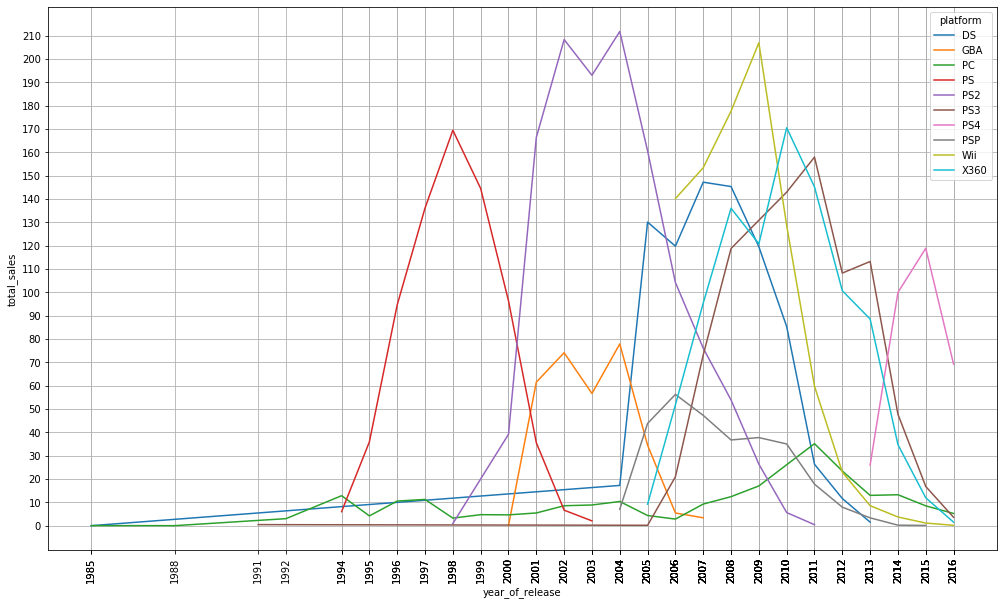

In [27]:
games_pl10=games_pl.query('platform in @top10')
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=games_pl10, x="year_of_release", y="total_sales", hue="platform")
plt.grid()
ax.set_xticks(games_pl10.year_of_release)
ax.set_xticklabels(games_pl10.year_of_release,rotation=90)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210])
plt.show()

In [28]:
print(games_pl.query('year_of_release==2016').sort_values(by='total_sales',ascending=False))
print(top10)

    platform  year_of_release  total_sales
163      PS4             2016        69.25
244     XOne             2016        26.15
20       3DS             2016        15.14
122       PC             2016         5.25
219     WiiU             2016         4.60
181      PSV             2016         4.25
159      PS3             2016         3.60
231     X360             2016         1.52
214      Wii             2016         0.18
0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9      PC
Name: platform, dtype: object


We can tell that a great number of games with the biggest sum of total sales nowadays became less popular and have 0 or close to 0 sales. Such as PS2, X360, PS3, Wii, DS, PS, GBA, PSP.
<br> From the graphs we can conclude that the lifespan of the platform is about 10 years, with a peak of sales somewhere in the middle of the life cycle. At this moment companies usually produce the next generation of the platform. It would take about 5 years more for the new version of the platform to become popular and replace the previous one in the market.

### Filter data by year and platform

In [29]:
df=pd.pivot_table(games,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
dynamics=(df-df.shift(+1)).T
dynamics

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,NaN,24.3,-6.8,-23.04,-5.57,0.18,0.22,1.27,-1.20,-0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.30,62.90,-11.44,4.81,-12.81,-15.98,-12.64
DC,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.0,0.0,0.00,0.00,0.02,-0.02,0.00,0.00,0.00,...,27.42,-1.87,-25.80,-34.21,-59.02,-14.66,-10.13,-1.54,0.00,0.00
GB,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.43,63.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.06,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-11.28,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


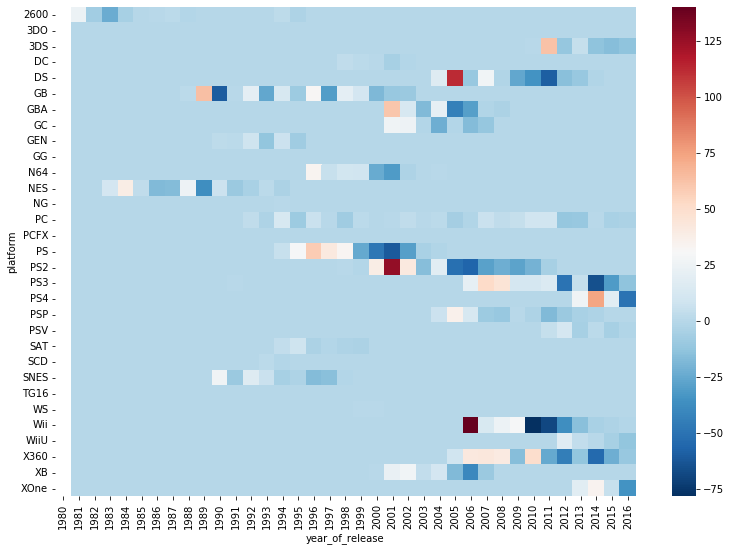

In [31]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r')

Based on the obtained graphs we can conclude that we are interested in platforms that were released around 2013. (They are the most popular ones in 2016). Also for the prognosis, it is reasonable to take data no older than 3-4 years from the year of interest.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   Int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     2237 non-null   Int64  
 9   user_score       2237 non-null   Int64  
 10  rating           2237 non-null   object 
 11  total_sales      2237 non-null   float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 233.7+ KB


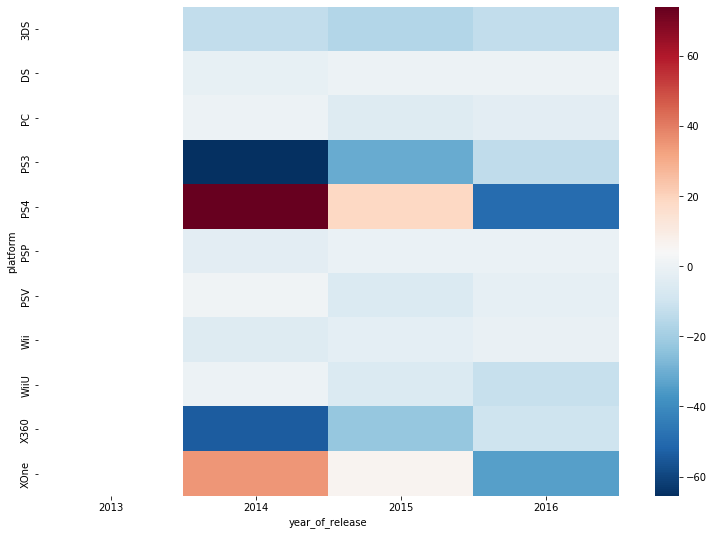

In [32]:
games_filt=games.query('year_of_release>=2013')
games_filt.info()
df_f=pd.pivot_table(games_filt,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
dynamics_f=(df_f-df_f.shift(+1)).T
plt.figure(figsize=(13,9))
sns.heatmap(dynamics_f, cmap='RdBu_r')

So, based on the sales leaders in 2016 and current tendencies, it is reasonable to take for the analysis the latest versions of platforms from each company and the PC.
<br> Thet are: PS4, XOne, 3DS, WiiU and PC.

In [33]:
platforms_new=['PS4','XOne', '3DS', 'WiiU', 'PC']
games_new=games_filt.query('platform in @platforms_new')
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,89,7,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,87,8,E,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,87,4,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6,M,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,111,11,unknown,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,111,7,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,111,11,unknown,0.01


In [34]:
on_games=games_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
on_games

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
1244,XOne,XCOM 2,0.04
1245,XOne,ZombiU,0.01
1246,XOne,Zombie Army Trilogy,0.11
1247,XOne,Zoo Tycoon (2013),0.36


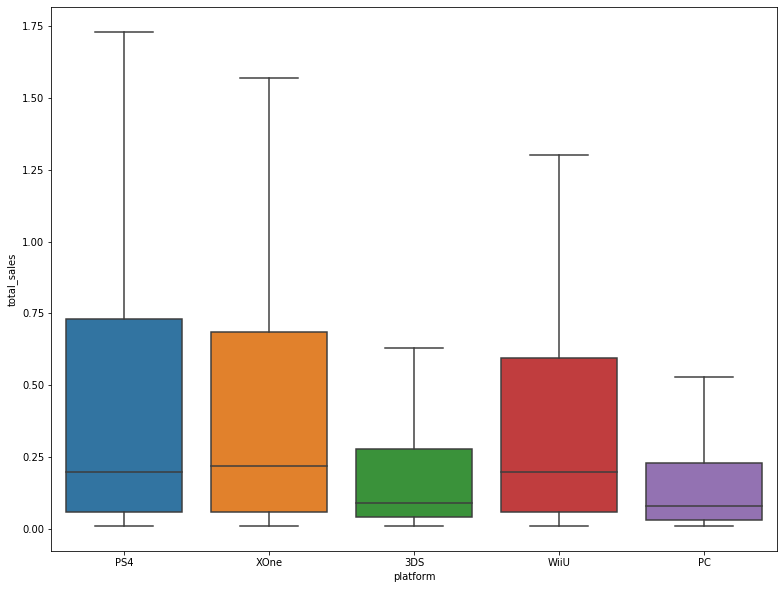

In [35]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=on_games,order=platforms_new,showfliers = False)


Average sales and distributions on the PS4, XOne and WiiU are very close. PS4 is leading in total sales among the platforms.
<br> There are also a lot of high profitable games for the platforms PS4 and XOne that affect the distribution. 
<br> Supposedely exclusive games for PS4 caused this advantage of the platform among other factors.

### Correlation

              total_sales  critic_score
total_sales      1.000000      0.275939
critic_score     0.275939      1.000000


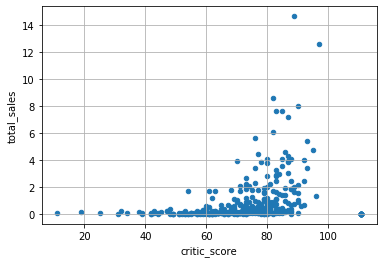

In [36]:
data=games_filt[games_filt['platform']=='PS4'][['total_sales','critic_score']]
data.plot(x='critic_score',y='total_sales', kind='scatter',grid=True)
print(data[['total_sales', 'critic_score']].corr())


             user_score  total_sales
user_score      1.00000     -0.04596
total_sales    -0.04596      1.00000


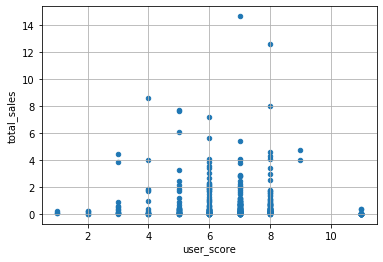

In [37]:
data=games_filt[games_filt['platform']=='PS4'][['total_sales','user_score']]
data.plot(x='user_score',y='total_sales', kind='scatter',grid=True)
print(data[['user_score', 'total_sales']].corr())


We don't see strong correlation between critics' scores and sales for PS4. The correlation between users' scores and sales is almost 0. 
<br> The check for other platforms is provided below.

PS4
              total_sales  critic_score
total_sales      1.000000      0.275939
critic_score     0.275939      1.000000

XOne
              total_sales  critic_score
total_sales      1.000000      0.294449
critic_score     0.294449      1.000000

3DS
              total_sales  critic_score
total_sales      1.000000      0.197882
critic_score     0.197882      1.000000

WiiU
              total_sales  critic_score
total_sales      1.000000      0.314057
critic_score     0.314057      1.000000

PC
              total_sales  critic_score
total_sales      1.000000      0.108964
critic_score     0.108964      1.000000



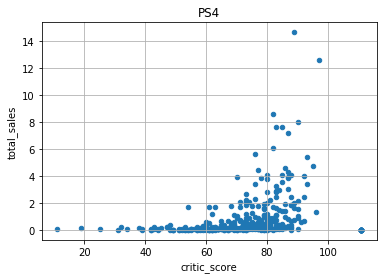

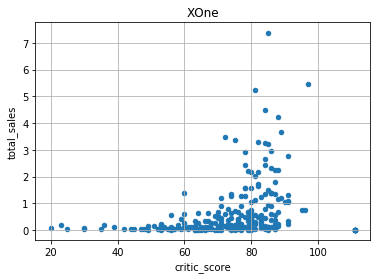

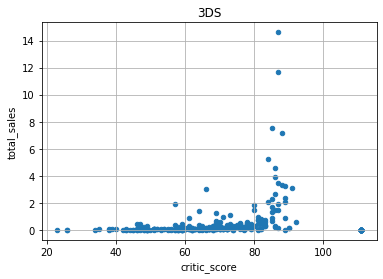

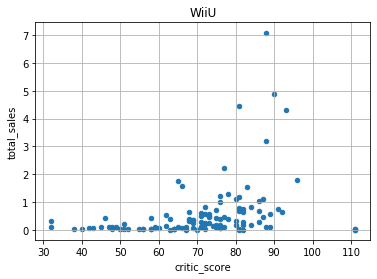

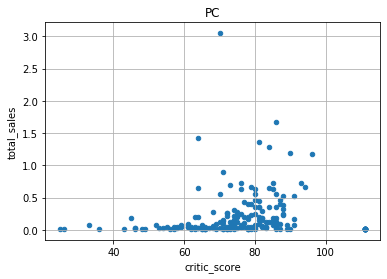

In [38]:
for i in platforms_new:
    data=games_filt[games_filt['platform']==i][['total_sales','critic_score']]
    data.plot(x='critic_score',y='total_sales', kind='scatter',grid=True,title=i)
    print(i)
    print(data[['total_sales', 'critic_score']].corr())
    print()

PS4
             total_sales  user_score
total_sales      1.00000    -0.04596
user_score      -0.04596     1.00000

XOne
             total_sales  user_score
total_sales     1.000000   -0.089726
user_score     -0.089726    1.000000

3DS
             total_sales  user_score
total_sales     1.000000   -0.000709
user_score     -0.000709    1.000000

WiiU
             total_sales  user_score
total_sales     1.000000    0.259484
user_score      0.259484    1.000000

PC
             total_sales  user_score
total_sales     1.000000   -0.145663
user_score     -0.145663    1.000000



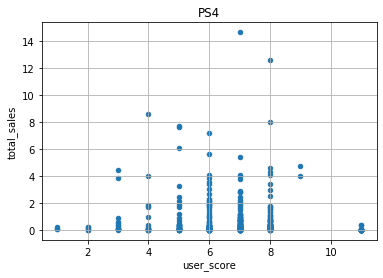

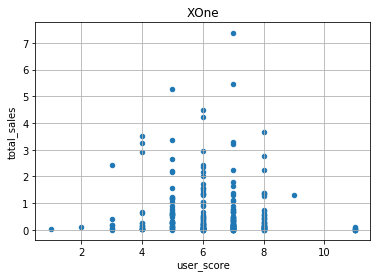

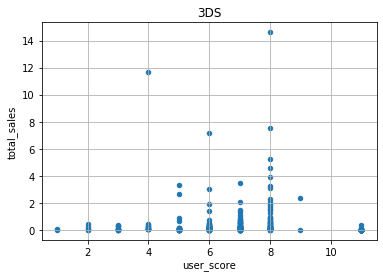

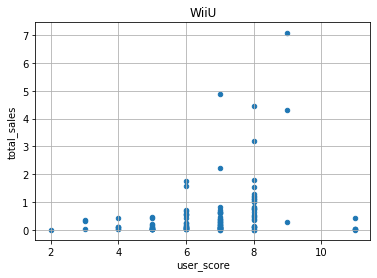

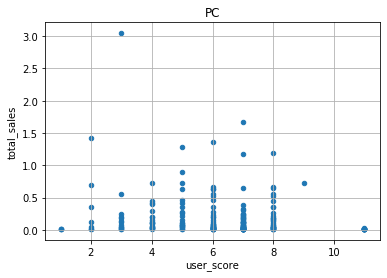

In [39]:
for i in platforms_new:
    data=games_filt[games_filt['platform']==i][['total_sales','user_score']]
    data.plot(x='user_score',y='total_sales', kind='scatter',grid=True,title=i)
    print(i)
    print(data[['total_sales', 'user_score']].corr())
    print()

Correlation is the same for other platforms as for PS4.
<br>Therefore critic reviews very slightly affect the sales. 
<br> User scores have almost no impact on sales for all platforms, except WiiU and PC where the correlation is the same as for the critic score.

### Genres

In [40]:
games_genres=games_new.pivot_table(index='genre',values='total_sales',aggfunc=('count','sum'))
games_genres

,count,sum
genre,,
Action,446,190.09
Adventure,83,13.03
Fighting,38,25.50
Misc,93,30.81
Platform,49,33.75
Puzzle,14,3.07
Racing,57,30.26
Role-Playing,150,113.71
Shooter,120,164.27


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f627d968910>,
      dtype=object)

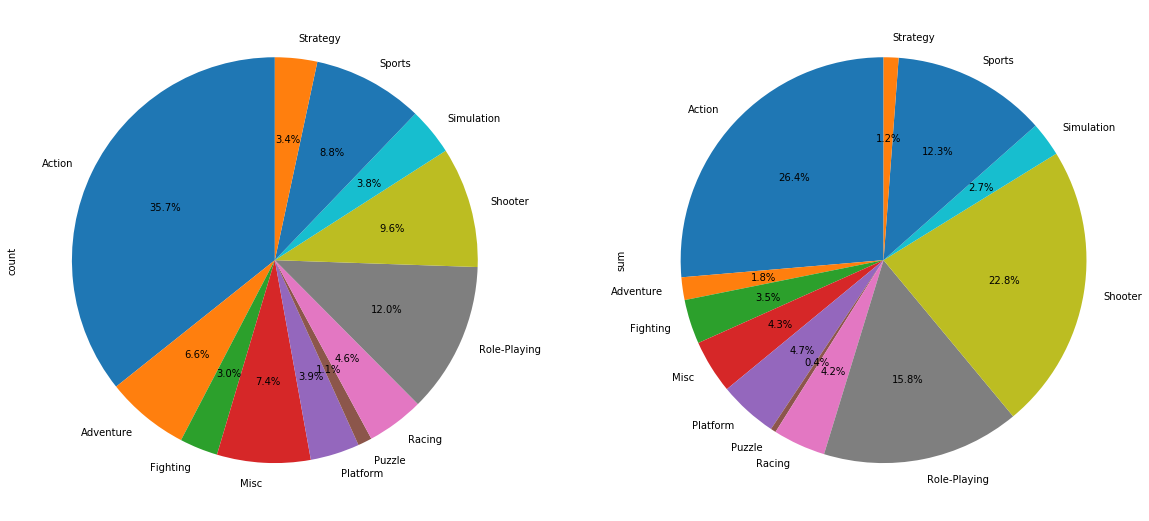

In [41]:
games_genres.plot(kind='pie', subplots=True,startangle=90,figsize=(20,15),autopct='%1.1f%%',legend=False)

The most profitable genres are Action, Shooters, Role-Playing and Sports.
<br> Action games are in the lead both in amount of game titles and profit.
<br>Fewer shooter games are released compared to Action and Role-playing, but they bring almost as much profit as Action. Therefore more copies of games are sold in this genre or they are more expensive. 

In [42]:
games_genres_2=games_new.pivot_table(index='genre',values='total_sales',aggfunc=('mean','median'))
games_genres_2

,mean,median
genre,,
Action,0.426211,0.115
Adventure,0.156988,0.060
Fighting,0.671053,0.155
Misc,0.331290,0.120
Platform,0.688776,0.260
Puzzle,0.219286,0.085
Racing,0.530877,0.120
Role-Playing,0.758067,0.190
Shooter,1.368917,0.495


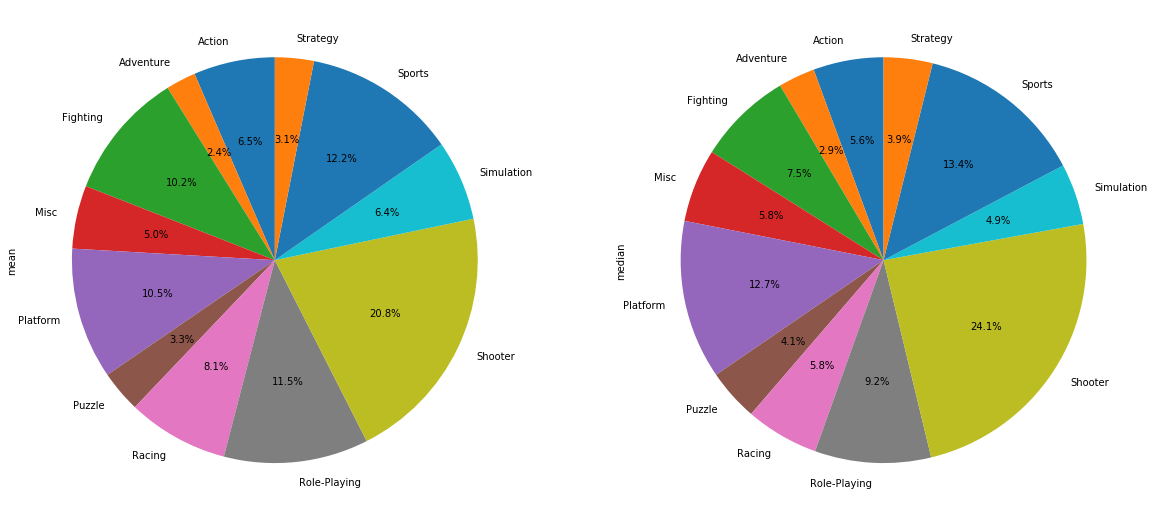

In [43]:
games_genres_2.plot(kind='pie', subplots=True,startangle=90,figsize=(20,15),autopct='%1.1f%%',legend=False)
plt.show()

Comparison of the mean and median with the total sales pie chart proves that shooters are more profitable as single games, therefore more copies of games are sold in this genre or they are more expensive. Action contains a lot of game tittles but each game is not as profitable.

### Conclusion

After analyzing the data through the years we were able to determine the current state of the games market. It experiences a slope after the peak at 2008-2009, and now sales are holding on around the same level. It would be better to take years very close to 2017 for prognosis as the years of interest.
<br> We've determined the most popular platforms and analysed the lifespan of the platforms in general. Based on that we've chosen the time period for building a prognosis (starting from 2013), and chosen to take the last versions of the popular platforms and filtered data accordingly.
<br> We didn't find any strong correlations between sales and critics and users scores. It can be explained by the fact that people probably buy games based on the marketing strategies, fewer people buy games much later when scores are available.
<br>The most profitable genres are Action, Shooters, Role-Playing and Sports.

## User profile for each region

### Platforms

In [44]:
na_region_plat=games_filt.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)
na_region_plat

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [45]:
jp_region_plat=games_filt.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)
jp_region_plat

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


In [46]:
eu_region_plat=games_filt.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)
eu_region_plat

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


### Genres

In [47]:
na_region_g=games_filt.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)
jp_region_g=games_filt.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)
eu_region_g=games_filt.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)

print('Top genres for na region:\n',na_region_g)
print('Top genres for jp region:\n',jp_region_g)
print('Top genres for eu region:\n',eu_region_g)
print()

Top genres for na region:
            genre  na_sales
0         Action    126.13
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49
Top genres for jp region:
           genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.44
2      Fighting      7.65
8       Shooter      6.61
Top genres for eu region:
            genre  eu_sales
0         Action    118.61
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19



### Ratings

In [48]:
na_region_r=games_filt.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head(5)
jp_region_r=games_filt.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head(5)
eu_region_r=games_filt.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head(5)

print('Top ratings for na region:\n',na_region_r)
print('Top ratings for jp region:\n',jp_region_r)
print('Top ratings for eu region:\n',eu_region_r)
print()

Top ratings for na region:
     rating  na_sales
3        M    187.00
0        E    104.21
4        T     60.82
1     E10+     56.38
5  unknown     20.46
Top ratings for jp region:
     rating  jp_sales
5  unknown     43.25
4        T     34.96
3        M     24.77
0        E     23.18
2       ET      8.59
Top ratings for eu region:
     rating  eu_sales
3        M    164.83
0        E    102.86
4        T     51.68
1     E10+     45.20
5  unknown     18.77



### Conclusion

1. The Japanese market prefers the platforms made by Japanese companies: 3DS, PS3,	PSV, PS4, WiiU.
For the na and eu markets we can see that the PlayStation is in the lead, though the company have to share the market with Microsoft.
2. The dominating genres for na and eu regions are Action, Shooter, Sports, Role-Playing and either misc or racing. This coincides with the overall picture of the most profitable genres. The jp market is dominated by role-playing games more than in other regions since it is a popular genre in Japan, and is represented there with a lot of game titles and subgenres.
3. For na and eu markets games that were rated as 'mature' (17+) are leading the top, which means that mature games are more likely to be profitable in these regions. As for Japan: we have a lot of "unknown" ratings which can be explained by the fact that the ratings in our data are provided by ESRB, when in Japan they have their own rating system and CERO to assign ratings presumably for the local market. But from the data that we have, we can't say that ratings have a lot of influence on sales.

## Test of the hypotheses

### Average user ratings of the Xbox One and PC platforms are the same.

Hypothesis:

- Average user ratings of the Xbox One and PC platforms are the same.


* Null hypothesis H₀: The mean user ratings from users of the Xbox One and PC platforms are the same.
* The alternative hypothesis, H₁, is based on H₀: For this H₀, H₁ would be, “The mean user ratings from users of the Xbox One and PC platforms differ.".
* Calculate the T-test for the means of two independent samples of scores. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. The variances of the datasets are considered different.
* Critical statistical significance is taken as 5%.

In [49]:
games_new = games_new.loc[games['user_score']!= 11]
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,89,7,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,87,8,E,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,87,4,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,77,7,M,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6,M,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,111,7,M,0.01


In [50]:
#rate_x=games_new.loc[(games_new['platform'] == 'XOne')].groupby('name')['user_score']
rate_x = games_new.query('platform == "XOne"')
rate_x.drop(rate_x.columns[[1,2,3,4,5,6,7,8,10,11]], axis = 1, inplace = True)
rate_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 99 to 16672
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        239 non-null    object
 1   user_score  239 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 5.8+ KB


/home/jovyan/.local/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
rate_pc = games_new.query('platform == "PC"')
rate_pc.drop(rate_pc.columns[[1,2,3,4,5,6,7,8,10,11]], axis = 1, inplace = True)
rate_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 458 to 16692
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        180 non-null    object
 1   user_score  180 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.4+ KB


In [52]:
#rate_x=games_new.loc[(games_new['platform'] == 'XOne')].groupby('name')['user_score'].agg('mean')
#rate_pc=games_new.loc[(games_new['platform'] == 'PC')].groupby('name')['user_score'].agg('mean')
alpha =0.05
results = st.ttest_ind(rate_x['user_score'], rate_pc['user_score'],equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We  reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.012977818327920035
We  reject the null hypothesis


### Average user ratings for the Action and Sports genres are different.

Hypothesis:

- Average user ratings for the Action and Sports genres are different.


* Null hypothesis H₀: Average user ratings for the Action and Sports genres are the same.
* The alternative hypothesis, H₁, is based on H₀: For this H₀, H₁ would be, “Average user ratings for the Action and Sports genres are different.".
* Calculate the T-test for the means of two independent samples of scores. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. The variances of the datasets are considered different.
* Critical statistical significance is taken as 5%.

In [53]:
#rate_a=games_new.loc[(games_new['genre'] == 'Action')].groupby('name')['user_score'].agg('mean')
#rate_s=games_new.loc[(games_new['genre'] == 'Sports')].groupby('name')['user_score'].agg('mean')

rate_a=games_new.loc[(games_new['genre'] == 'Action')]
rate_s=games_new.loc[(games_new['genre'] == 'Sports')]
alpha =0.05
results = st.ttest_ind(rate_a['user_score'], rate_s['user_score'],equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We  reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.472090004309503e-10
We  reject the null hypothesis


### Conclusion

1. We rejected first null hypotheses, therefore average user ratings of the Xbox One and PC platforms might be different.
2. We failed to reject second hypotheses, therefore average user ratings for the Action and Sports genres might be different.

## General conclusion

We were provided with the data on games and game sales up to the year 2016 to make a prognosis for the 2017 campaign. We preprocessed data, filled missing values where it was possible and analyzed it. After the analysis, we took a slice of our data that is relevant for making the 2017 prognosis. We determined potentially the most profitable platforms: PS4, XOne, 3DS, WiiU, PC, and defined time period from 2013 to 2016 as desirable for further research.
<br> There is no significant correlation between scores and sales. The most profitable genres are Action, Shooters, Role-Playing and Sports. In na and eu regions games rated mature are likely to be profitable.
<br> Therefore, in the future advertising action or shooter games on PS4 will bring the most profit.